## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_lab_results = pd.merge(mouse_metadata, study_results, how = "left" , on = "Mouse ID")
# Display the data table for preview
mouse_lab_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(mouse_lab_results["Mouse ID"].unique())


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_lab_results.loc[mouse_lab_results.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id = pd.DataFrame(duplicate_mouse_id)
all_duplicate_mouse_id

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_df = mouse_lab_results[mouse_lab_results ["Mouse ID"].isin(duplicate_mouse_id) == False]
clean_mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df["Mouse ID"].unique())


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sem = clean_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
mean = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
standard_deviation = clean_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
variance = clean_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_table = pd.DataFrame({"Tumor Volume Standard Error" : sem , 
                            "Tumor Volume Mean" : mean , 
                           "Tumor Volume Median" : median ,
                            "Tumor Volume Standard Deviation" : standard_deviation ,
                         "Tumor Volume Variance" : variance})

mouse_table

,Tumor Volume Standard Error,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume Variance
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,4.994774,24.947764
Ceftamin,0.469821,52.591172,51.776157,6.268188,39.290177
Infubinol,0.492236,52.884795,51.820584,6.567243,43.128684
Ketapril,0.603860,55.235638,53.698743,8.279709,68.553577
Naftisol,0.596466,54.331565,52.509285,8.134708,66.173479
Placebo,0.581331,54.033581,52.288934,7.821003,61.168083
Propriva,0.544332,52.320930,50.446266,6.622085,43.852013
Ramicane,0.320955,40.216745,40.673236,4.846308,23.486704
Stelasyn,0.573111,54.233149,52.431737,7.710419,59.450562


## Bar and Pie Charts

In [9]:
#time points for drug

timepoints_df = clean_mouse_df.copy()

timepoints_count = timepoints_df.value_counts("Drug Regimen")
timepoints_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

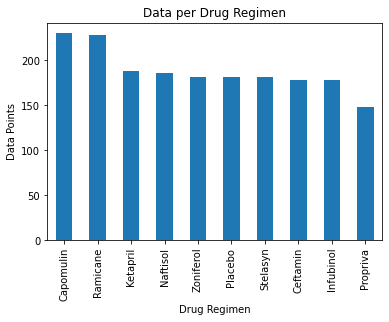

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_count.plot(kind="bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

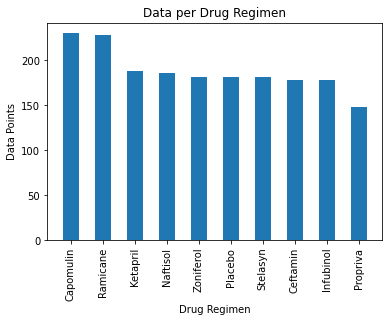

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
width = [0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
plt.bar(x_axis, timepoints_count, width = width)
plt.title("Data per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks(rotation = 90)
plt.show


In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_mouse_df.copy()

gender_grouped = gender_df.groupby("Sex")
sex_count = gender_grouped.nunique("Mouse ID")

sex_count.rename(columns = {"Mouse ID": "Sex of Mice"} , inplace=True)


Text(0.5, 1.0, 'Sex Ratio')

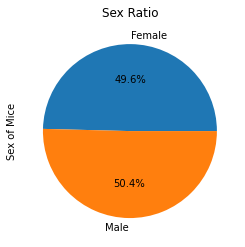

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count["Sex of Mice"].plot(kind="pie", autopct='%1.1f%%')
plt.title("Sex Ratio")


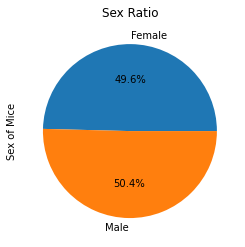

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Matplotlib
labels = ["Female", "Male"]

plt.pie(sex_count["Sex of Mice"], labels=labels,autopct='%1.1f%%')
plt.title("Sex Ratio")
plt.ylabel("Sex of Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
